<div style="padding:20px;color:#131842;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#FFA38F;overflow:hidden;font-weight:800">Market Segmentation</div>

# Understanding Market Segmentation

Market segmentation involves dividing a broad consumer or business market into sub-groups of consumers based on some type of shared characteristics. The goal is to tailor marketing strategies and campaigns to these specific segments to better meet their needs and improve sales and customer satisfaction.



# Project Steps

1. Data Collection: Gather data relevant to the segmentation bases.
2. Exploratory Data Analysis (EDA): Understand the dataset, identify patterns, and visualize data.
3. Feature Engineering: Create new features or modify existing ones to better represent the data.
4. Segmentation Model: Apply machine learning algorithms to segment the market.
5. Evaluation and Interpretation: Evaluate the segmentation model and interpret the results to derive actionable insights.

## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  Import Libraries</div></b>

In [24]:
#importing necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report
import plotly.express as px
import plotly.graph_objects as go
from sklearn import tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings("ignore") 

## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Download Dataset</div></b>

In [25]:
df = pd.read_csv("Customer Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  EDA</div></b>

In [26]:
#Checking rows and columns

print("No of Rows: ",df.shape[0])
print("No of Columns: ",df.shape[1])


No of Rows:  8950
No of Columns:  18


In [27]:
#Checking Datatype information and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [29]:
#Checking Null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#e14169;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Let's replace the null numbers with the mean value.</div>

In [30]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [31]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [33]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [34]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Visualization </div></b>

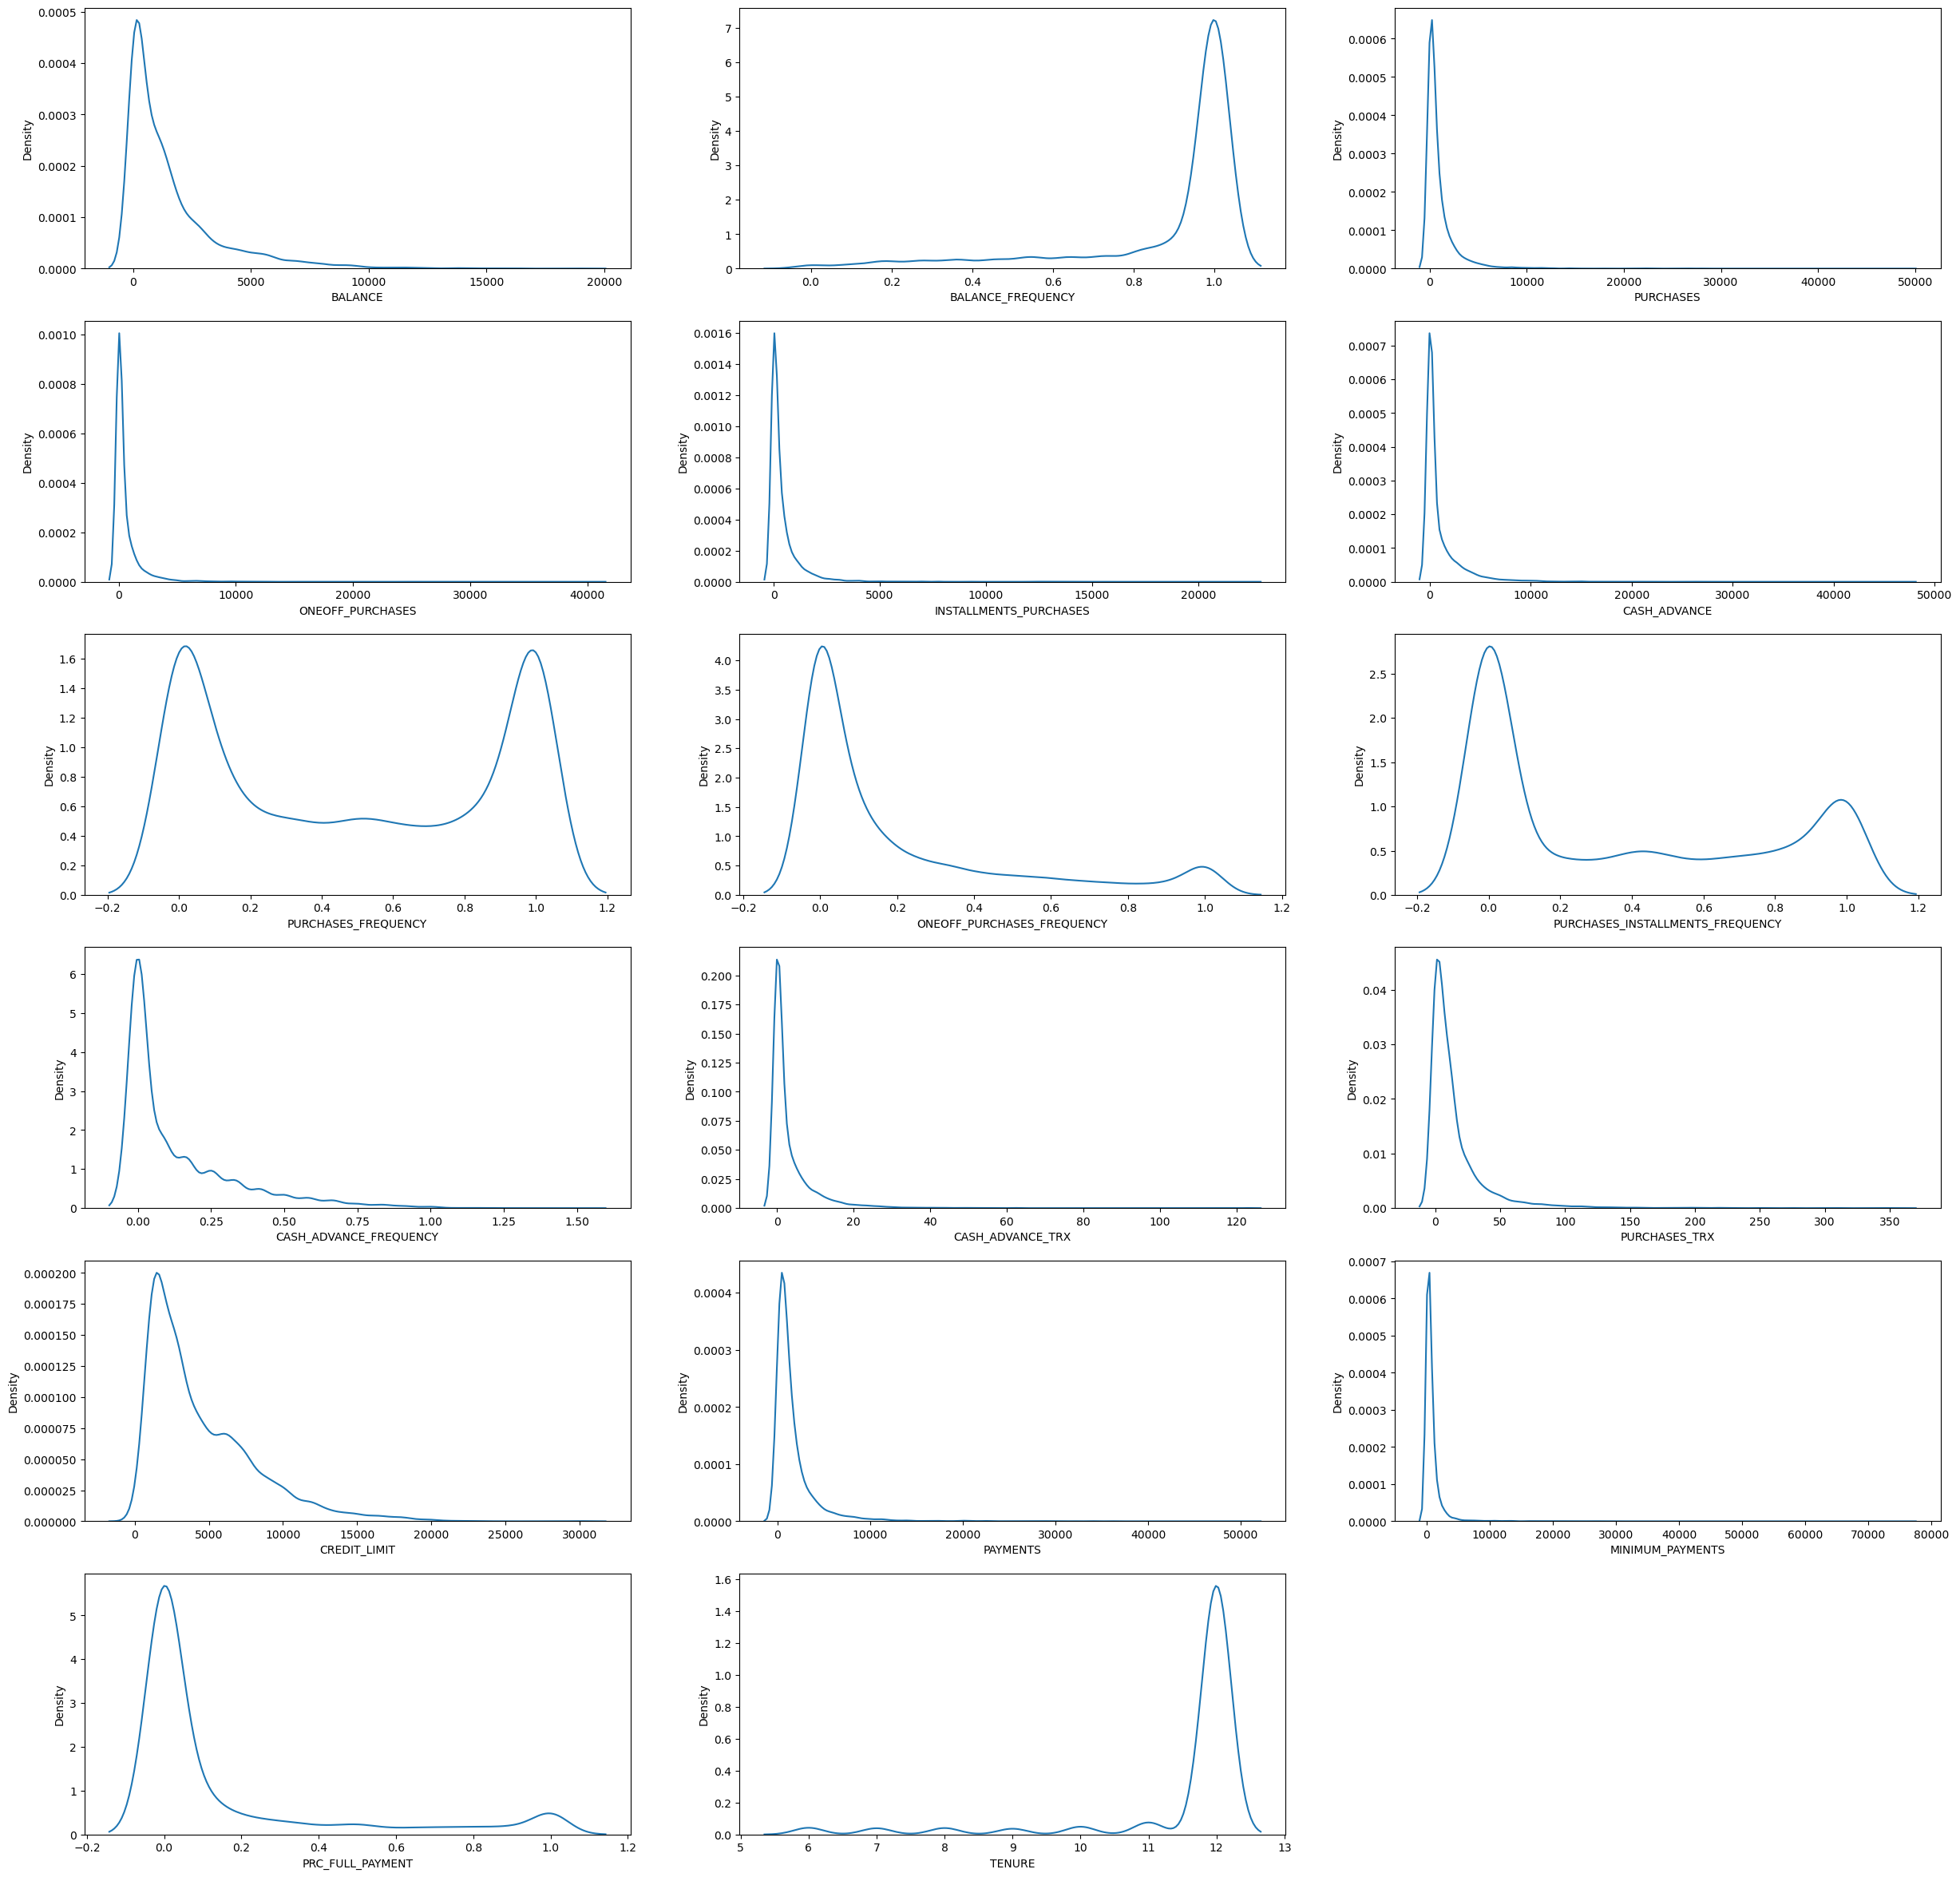

In [35]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 3, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

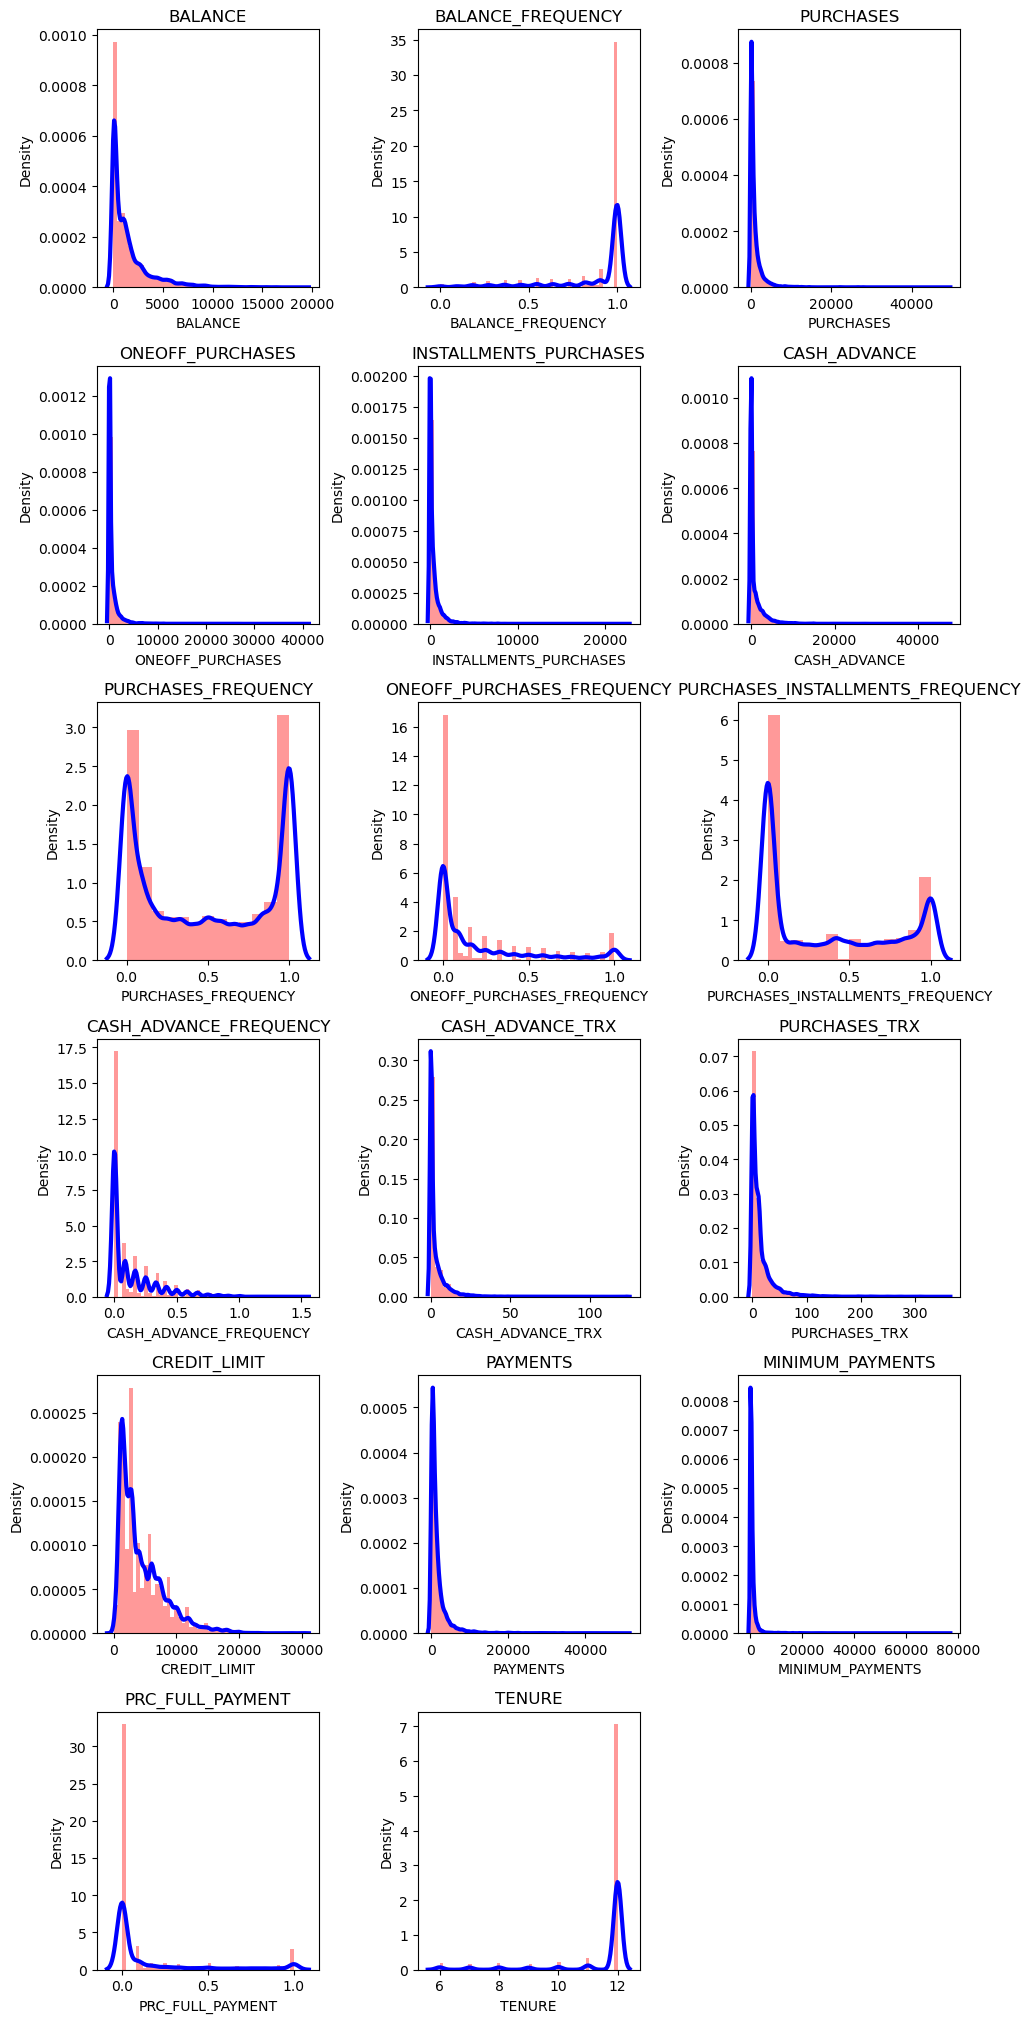

In [36]:
plt.figure(figsize=(10,30))
for i in range(0,17):
    plt.subplot(9,3,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(df.columns[i])
plt.tight_layout()

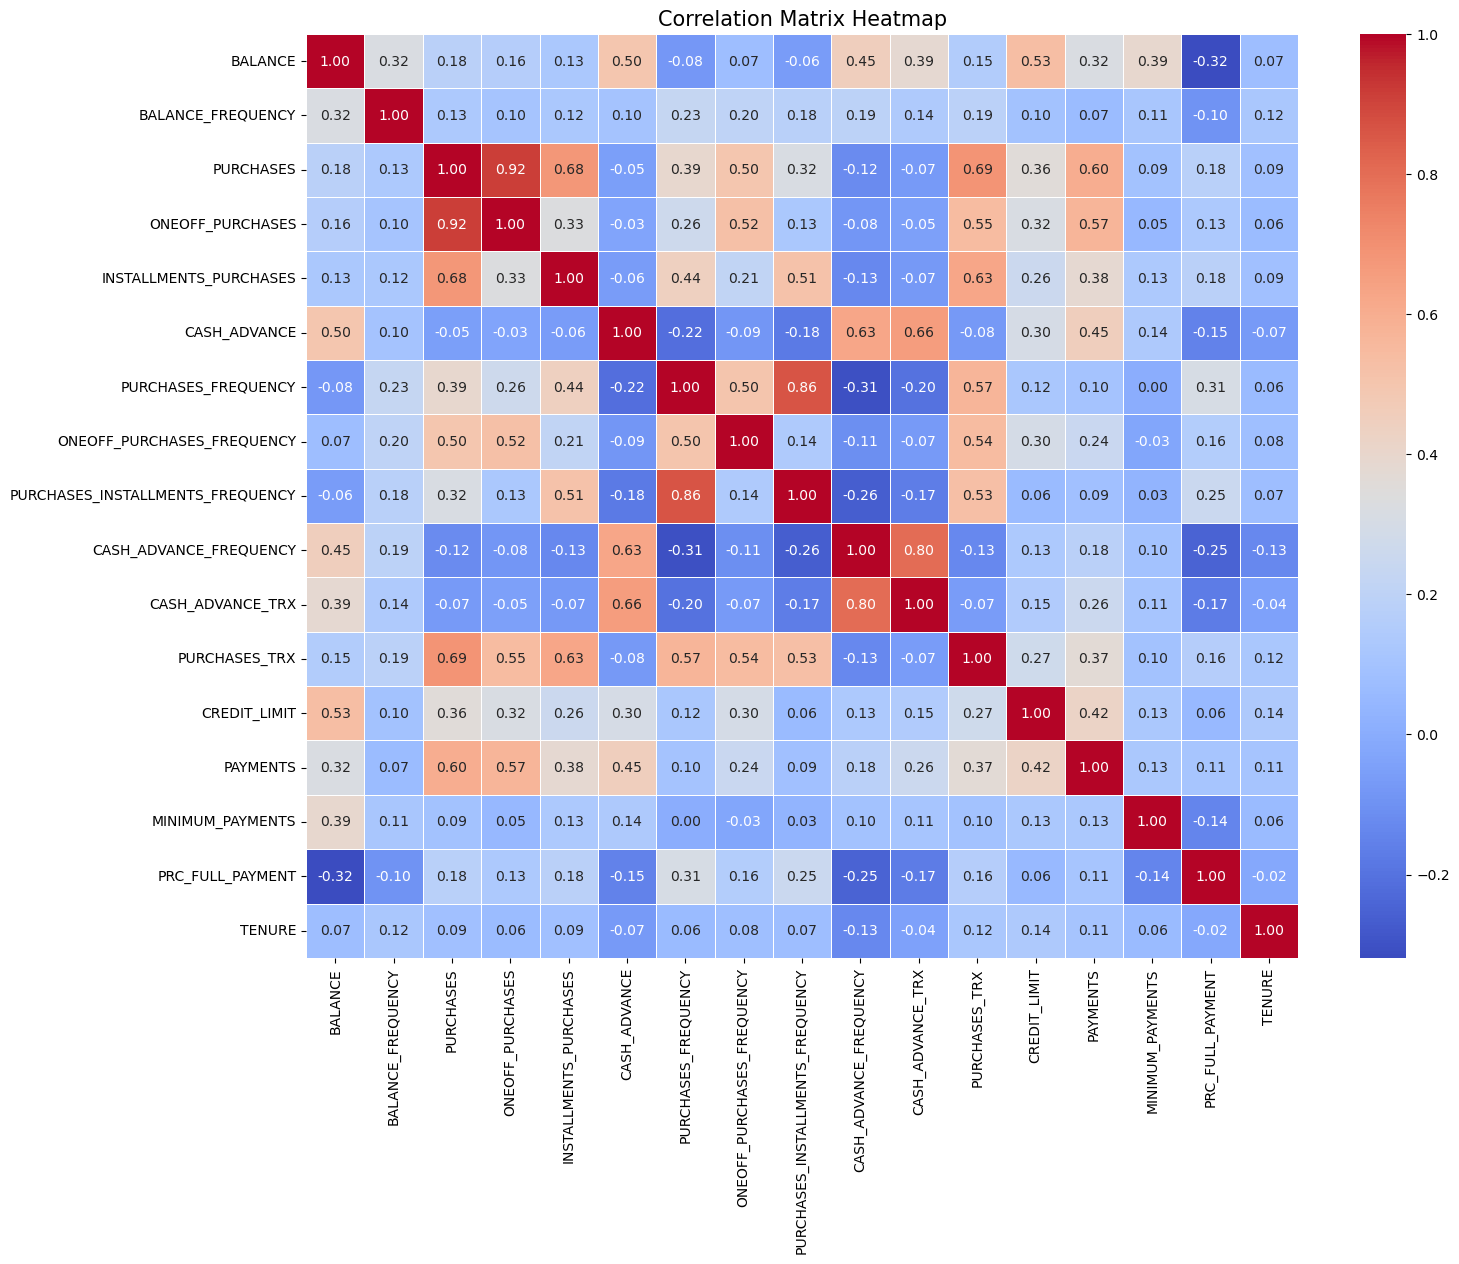

In [37]:
# Calculate the Heatmap correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', size=15)
plt.show()

## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  Scaling the Data </div></b>

In [38]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

In [39]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  PCA (Principal component Analysis) </div></b>

In [40]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076454
1,-1.138299,2.506477
2,0.969690,-0.383540
3,-0.873626,0.043135
4,-1.599435,-0.688575
...,...,...
8945,-0.359628,-2.016146
8946,-0.564369,-1.639124
8947,-0.926203,-1.810786
8948,-2.336556,-0.657936


## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>7  |  Algorithms </div></b>

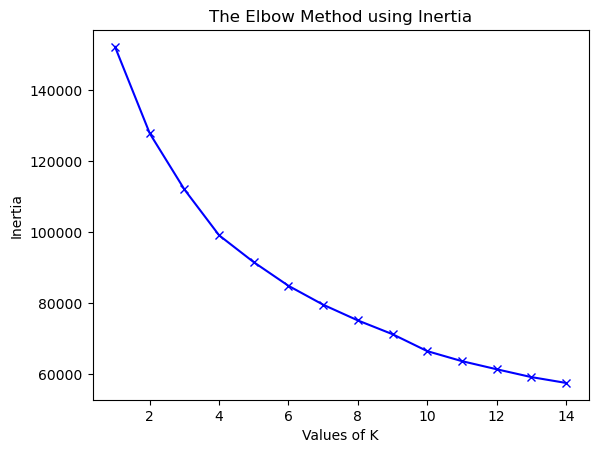

In [41]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [42]:

kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.682221,-1.076454,0
1,-1.138299,2.506477,2
2,0.969690,-0.383540,1
3,-0.873626,0.043135,0
4,-1.599435,-0.688575,0
...,...,...,...
8945,-0.359628,-2.016146,1
8946,-0.564369,-1.639124,1
8947,-0.926203,-1.810786,1
8948,-2.336556,-0.657936,0


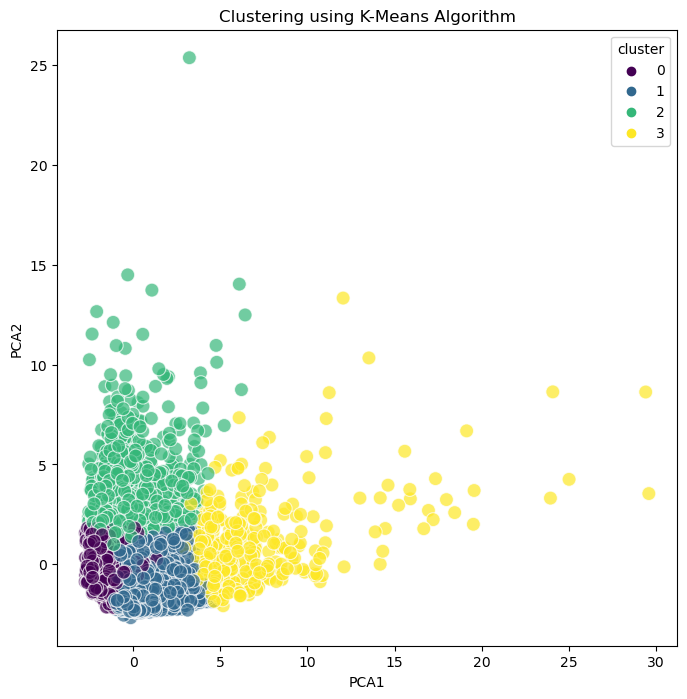

In [43]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette='viridis' ,s=100, alpha=0.7)
plt.title("Clustering using K-Means Algorithm")
plt.savefig("pca_result.jpg")
plt.show()
# Save the plot as a JPEG file


In [44]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [45]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [46]:
cluster_df['Cluster'].value_counts()

0    3976
1    3367
2    1198
3     409
Name: Cluster, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

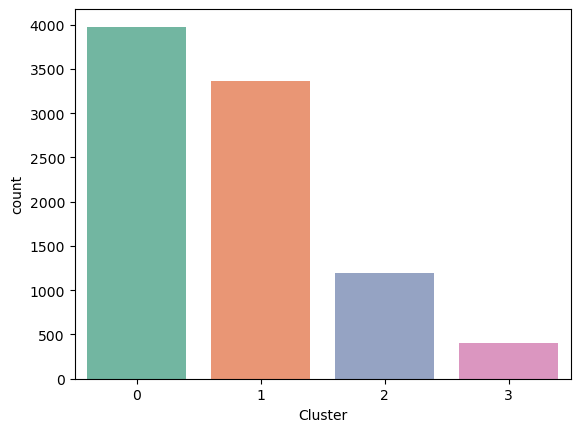

In [51]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df, palette='Set2')


## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>8  |  Saving sckitlearn models </div></b>

In [58]:
# Saving the kmeans clustering model and the data with cluster label
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [59]:
cluster_df.to_csv("Clustered_Customer_Dataset.csv", index = False )

## <b><div style='padding:15px;background-color:#e14169;color:white;border-radius:40px;font-size:110%;text-align: center'>End Part 1 .... </div></b>

# Now we have 4 Class (customer category) its a multi class model

We will train this model with different algorythm and find best model out of it

In [53]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### Split the data and train our model with 70% on training and 30% Testing

In [56]:
#Split Dataset 
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [57]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6265, 17) (6265, 1)
(2685, 17) (2685, 1)


## <b><div style='padding:15px;background-color:#597445;color:white;border-radius:40px;font-size:110%;text-align: center'>9  | Apply Decision Tree Algo</div></b>

In [60]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1153   32   23    0]
 [  29  970   11   11]
 [  29   18  293    3]
 [   1   16    1   95]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1208
           1       0.94      0.95      0.94      1021
           2       0.89      0.85      0.87       343
           3       0.87      0.84      0.86       113

    accuracy                           0.94      2685
   macro avg       0.91      0.90      0.91      2685
weighted avg       0.93      0.94      0.93      2685



In [62]:
result = model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9351955307262569 % Acuuracy



## <b><div style='padding:15px;background-color:#91DDCF;color:402E7A;border-radius:40px;font-size:110%;text-align: center'>Hyperparameter tuning using GridSearchCV</div></b>

In [70]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train the model with the best parameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

result1 = best_model.score(X_test, y_test)
print(result1, '% Accuracy')


Best parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation accuracy: 0.9393455706304868
[[1155   29   24    0]
 [  32  962   16   11]
 [  29   20  293    1]
 [   0   14    2   97]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1208
           1       0.94      0.94      0.94      1021
           2       0.87      0.85      0.86       343
           3       0.89      0.86      0.87       113

    accuracy                           0.93      2685
   macro avg       0.91      0.90      0.91      2685
weighted avg       0.93      0.93      0.93      2685

0.933705772811918 % Accuracy



## <b><div style='padding:15px;background-color:#91DDCF;color:#402E7A;border-radius:40px;font-size:110%;text-align: center'>Random Forest Classifier</div></b>

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(metrics.confusion_matrix(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

# Save the Random Forest model
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

result2 = rf_model.score(X_test, y_test)
print(result2, '% Accuracy')



[[1170   22   16    0]
 [  24  982    8    7]
 [  18   10  314    1]
 [   1   14    1   97]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1208
           1       0.96      0.96      0.96      1021
           2       0.93      0.92      0.92       343
           3       0.92      0.86      0.89       113

    accuracy                           0.95      2685
   macro avg       0.94      0.93      0.93      2685
weighted avg       0.95      0.95      0.95      2685

0.954562383612663 % Accuracy



## <b><div style='padding:25px;background-color:#91DDCF;color:#402E7A;border-radius:40px;font-size:150%;text-align: center'>Gradient Boositng Classfier</div></b>

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print(metrics.confusion_matrix(y_test, y_pred_gb))
print(metrics.classification_report(y_test, y_pred_gb))

# Save the Gradient Boosting model
filename = 'gb_model.sav'
pickle.dump(gb_model, open(filename, 'wb'))


# Load and test the saved model
gb_model = pickle.load(open(filename, 'rb'))
result3 = gb_model.score(X_test, y_test)
print(result3, '% Accuracy')

[[1182   13   13    0]
 [  16  990    8    7]
 [  15    5  322    1]
 [   0   10    2  101]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1208
           1       0.97      0.97      0.97      1021
           2       0.93      0.94      0.94       343
           3       0.93      0.89      0.91       113

    accuracy                           0.97      2685
   macro avg       0.95      0.95      0.95      2685
weighted avg       0.97      0.97      0.97      2685

0.9664804469273743 % Accuracy


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


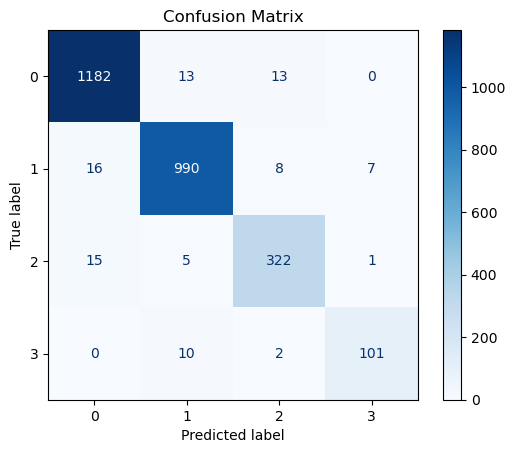

In [68]:
# Assuming y_test and y_pred_gb are already defined
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#e14169;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Okay, now we've narrowed down the predictions with different algorythm and found Best model Gradient Decent with 97% Accuracy.</div>


## <b><div style='padding:25px;background-color:#91DDCF;color:#402E7A;border-radius:40px;font-size:150%;text-align: center'>Thank you </div></b>